In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a1_avg = 0.49 # average arrival rate for queue 1 (input 1 to output 2)
a2_avg = 0.49 # average arrival rate for queue 2 (input 2 to output 1)
a3_avg = 0.49 # average arrival rate for queue 3 (input 2 to output 2)

s = np.array([1, 1, 0]) # current service configuration

In [3]:
# strategy 1 (maxWeight strategy):
# during each interval [t - 1, t], choose a configuration such that the queues being served have the maximum combined size

def chooseMaxWeightServiceConfiguration(s, q):
    if q[0] + q[1] >= q[2]:
        s[0] = s[1] = 1
        return
    s[2] = 1

# simulate 10,000,001 times, with q1(0) = q2(0) = q3(0) = 0
# discard first 2,000,000 samples to ensure steady state
# take samples every 100 times to ensure independence

q1 = np.zeros(10000002)
q1_output = np.zeros(80001)
q2 = np.zeros(10000002)
q2_output = np.zeros(80001)
q3 = np.zeros(10000002)
q3_output = np.zeros(80001)

for t in range(1, 10000002):
    a1 = np.random.poisson(a1_avg)
    #a1 = np.random.binomial(n = 10, p = a1_avg / 10)
    #a1 = np.random.hypergeometric(6, 94, 5)
    a2 = np.random.poisson(a2_avg)
    a3 = np.random.poisson(a3_avg)
    s = np.zeros(3)
    chooseMaxWeightServiceConfiguration(s, np.array([q1[t - 1], q2[t - 1], q3[t - 1]]))
    q1[t] = max(q1[t - 1] + a1 - s[0], 0)
    q2[t] = max(q2[t - 1] + a2 - s[1], 0)
    q3[t] = max(q3[t - 1] + a3 - s[2], 0)

for t in range(0, 80001):
    q1_output[t] = q1[2 * 1000000 + 1 + 100 * t]
    q2_output[t] = q2[2 * 1000000 + 1 + 100 * t]
    q3_output[t] = q3[2 * 1000000 + 1 + 100 * t]

Policy = MaxWeight
Average Arrival Rate for Queue 1 = λ₁ = 0.49
Average Arrival Rate for Queue 2 = λ₂ = 0.49
Average Arrival Rate for Queue 3 = λ₃ = 0.49
Service Rate μ = 1 (for all 3 queues)

Steady-state Average Size of Queue 1 = ̅q₁ ≈ 11.613
Steady-state Average Size of Queue 2 = ̅q₂ ≈ 12.058
Steady-state Average Size of Queue 3 = ̅q₃ ≈ 24.103
̅q₁ + ̅q₂ ≈ 23.671
Steady-state Average Total Queue Size ≈ 47.773


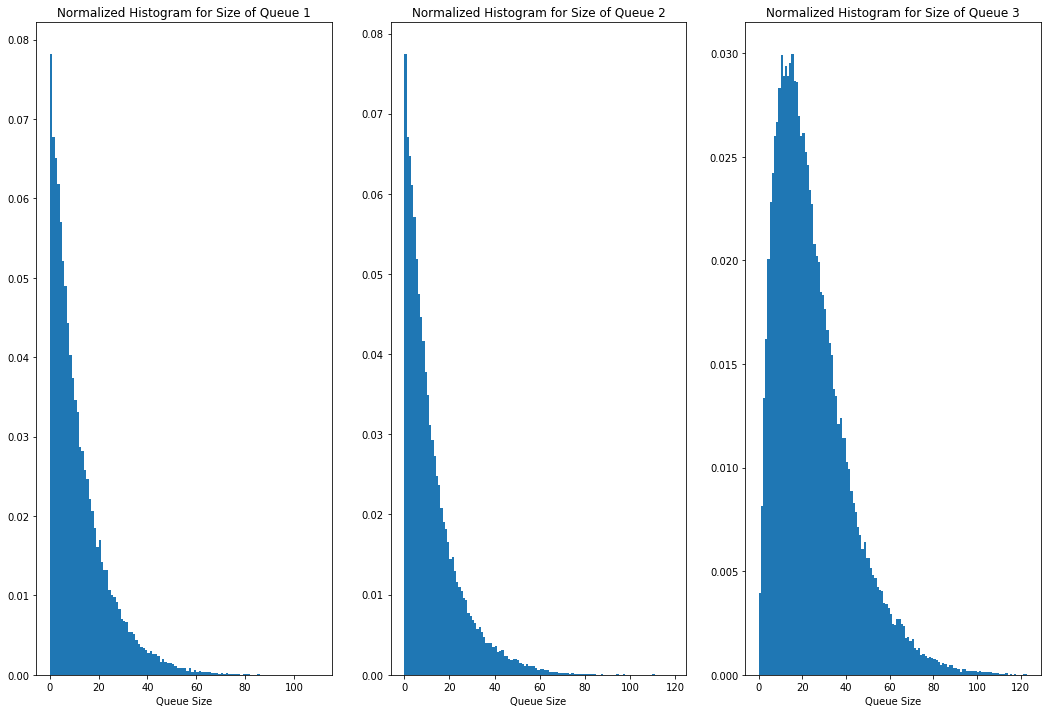

In [4]:
# output for strategy 1

print('Policy = MaxWeight')
print('Average Arrival Rate for Queue 1 = \u03BB\u2081 =', a1_avg)
print('Average Arrival Rate for Queue 2 = \u03BB\u2082 =', a2_avg)
print('Average Arrival Rate for Queue 3 = \u03BB\u2083 =', a3_avg)
print('Service Rate \u03BC = 1 (for all 3 queues)')
print('\nSteady-state Average Size of Queue 1 = \u0305q\u2081 \u2248', round(np.average(q1_output), 3))
print('Steady-state Average Size of Queue 2 = \u0305q\u2082 \u2248', round(np.average(q2_output), 3))
print('Steady-state Average Size of Queue 3 = \u0305q\u2083 \u2248', round(np.average(q3_output), 3))
print('\u0305q\u2081 + \u0305q\u2082 \u2248', round(np.average(q1_output + q2_output), 3))
print('Steady-state Average Total Queue Size \u2248', round(np.average(q1_output + q2_output + q3_output), 3))

plt.figure(figsize = (18, 12))

plt.subplot(1, 3, 1)

plt.hist(q1_output, bins = np.linspace(0, int(max(q1_output)) + 1, int(max(q1_output) + 2)), density = True)
plt.xlabel('Queue Size')
plt.title('Normalized Histogram for Size of Queue 1')


plt.subplot(1, 3, 2)

plt.hist(q2_output, bins = np.linspace(0, int(max(q2_output)) + 1, int(max(q2_output) + 2)), density = True)
plt.xlabel('Queue Size')
plt.title('Normalized Histogram for Size of Queue 2')


plt.subplot(1, 3, 3)

plt.hist(q3_output, bins = np.linspace(0, int(max(q3_output)) + 1, int(max(q3_output) + 2)), density = True)
plt.xlabel('Queue Size')
plt.title('Normalized Histogram for Size of Queue 3')

plt.show()

In [5]:
# strategy 2 (maxSizeCenter strategy):
# during each interval [t - 1, t], choose a configuration that serves the first two queues unless both of them are empty and the third one is not

def chooseServeNonzeroQueuesConfiguration(s, q):
    if q[2] == 0:
        s[0] = s[1] = 1
        return
    if q[0] == 0 or q[1] == 0:
        s[2] = 1
        return
    s[0] = s[1] = 1

# simulate 10,000,001 times, with q1(0) = q2(0) = q3(0) = 0
# discard first 2,000,000 samples to ensure steady state
# take samples every 100 times to ensure independence

q1 = np.zeros(10000002)
q1_output = np.zeros(80001)
q2 = np.zeros(10000002)
q2_output = np.zeros(80001)
q3 = np.zeros(10000002)
q3_output = np.zeros(80001)

for t in range(1, 10000002):
    a1 = np.random.poisson(a1_avg)
    #a1 = np.random.binomial(n = 10, p = a1_avg / 10)
    #a1 = np.random.hypergeometric(6, 94, 5)
    a2 = np.random.poisson(a2_avg)
    a3 = np.random.poisson(a3_avg)
    s = np.zeros(3)
    chooseServeNonzeroQueuesConfiguration(s, np.array([q1[t - 1], q2[t - 1], q3[t - 1]]))
    q1[t] = max(q1[t - 1] + a1 - s[0], 0)
    q2[t] = max(q2[t - 1] + a2 - s[1], 0)
    q3[t] = max(q3[t - 1] + a3 - s[2], 0)

for t in range(0, 80001):
    q1_output[t] = q1[2 * 1000000 + 1 + 100 * t]
    q2_output[t] = q2[2 * 1000000 + 1 + 100 * t]
    q3_output[t] = q3[2 * 1000000 + 1 + 100 * t]

Policy = MaxSizeCenter
Average Arrival Rate for Queue 1 = λ₁ = 0.49
Average Arrival Rate for Queue 2 = λ₂ = 0.49
Average Arrival Rate for Queue 3 = λ₃ = 0.49
Service Rate μ = 1 (for all 3 queues)

Steady-state Average Size of Queue 1 = ̅q₁ ≈ 9.948
Steady-state Average Size of Queue 2 = ̅q₂ ≈ 9.946
Steady-state Average Size of Queue 3 = ̅q₃ ≈ 14.446
̅q₁ + ̅q₂ ≈ 19.894
Steady-state Average Total Queue Size = ≈ 34.34


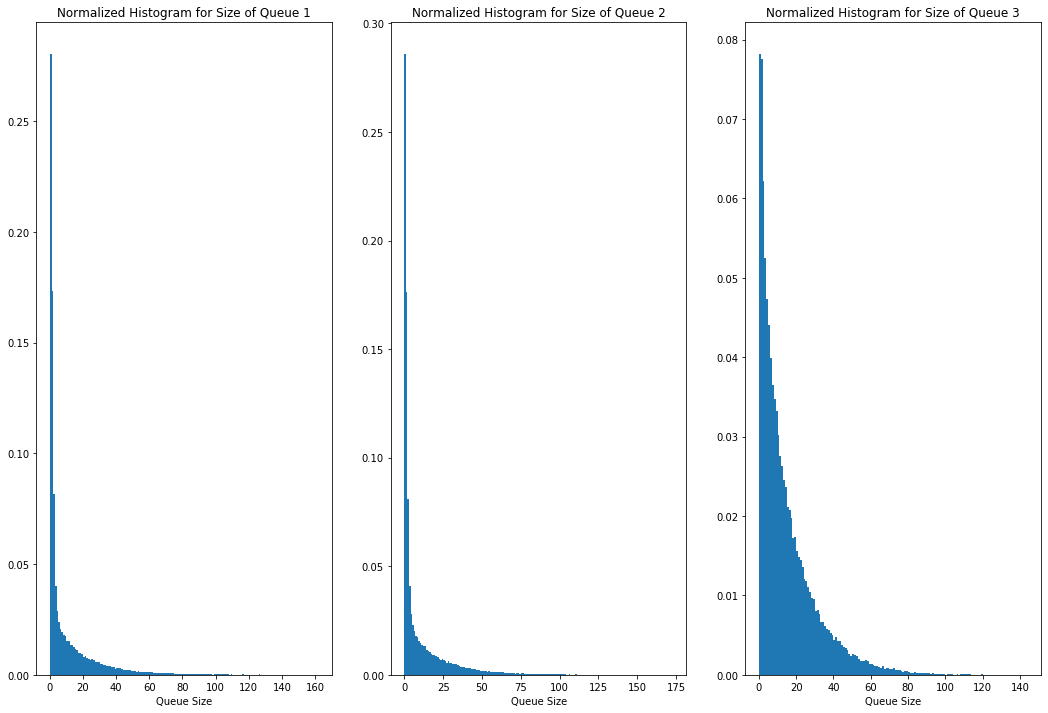

In [6]:
# output for strategy 2

print('Policy = MaxSizeCenter')
print('Average Arrival Rate for Queue 1 = \u03BB\u2081 =', a1_avg)
print('Average Arrival Rate for Queue 2 = \u03BB\u2082 =', a2_avg)
print('Average Arrival Rate for Queue 3 = \u03BB\u2083 =', a3_avg)
print('Service Rate \u03BC = 1 (for all 3 queues)')
print('\nSteady-state Average Size of Queue 1 = \u0305q\u2081 \u2248', round(np.average(q1_output), 3))
print('Steady-state Average Size of Queue 2 = \u0305q\u2082 \u2248', round(np.average(q2_output), 3))
print('Steady-state Average Size of Queue 3 = \u0305q\u2083 \u2248', round(np.average(q3_output), 3))
print('\u0305q\u2081 + \u0305q\u2082 \u2248', round(np.average(q1_output + q2_output), 3))
print('Steady-state Average Total Queue Size = \u2248', round(np.average(q1_output + q2_output + q3_output), 3))

plt.figure(figsize = (18, 12))

plt.subplot(1, 3, 1)

plt.hist(q1_output, bins = np.linspace(0, int(max(q1_output)) + 1, int(max(q1_output) + 2)), density = True)
plt.xlabel('Queue Size')
plt.title('Normalized Histogram for Size of Queue 1')


plt.subplot(1, 3, 2)

plt.hist(q2_output, bins = np.linspace(0, int(max(q2_output)) + 1, int(max(q2_output) + 2)), density = True)
plt.xlabel('Queue Size')
plt.title('Normalized Histogram for Size of Queue 2')


plt.subplot(1, 3, 3)

plt.hist(q3_output, bins = np.linspace(0, int(max(q3_output)) + 1, int(max(q3_output) + 2)), density = True)
plt.xlabel('Queue Size')
plt.title('Normalized Histogram for Size of Queue 3')

plt.show()

In [7]:
# strategy 3 (random strategy):
# during each interval [t - 1, t], choose a random configuration

def chooseRandomServiceConfiguration(s):
    if np.random.choice(2) == 0:
        s[0] = s[1] = 1
        return
    s[2] = 1

# simulate 10,000,001 times, with q1(0) = q2(0) = q3(0) = 0
# discard first 2,000,000 samples to ensure steady state
# take samples every 100 times to ensure independence

q1 = np.zeros(10000002)
q1_output = np.zeros(80001)
q2 = np.zeros(10000002)
q2_output = np.zeros(80001)
q3 = np.zeros(10000002)
q3_output = np.zeros(80001)

for t in range(1, 10000002):
    a1 = np.random.poisson(a1_avg)
    #a1 = np.random.binomial(n = 10, p = a1_avg / 10)
    #a1 = np.random.hypergeometric(6, 94, 5)
    a2 = np.random.poisson(a2_avg)
    a3 = np.random.poisson(a3_avg)
    s = np.zeros(3)
    chooseRandomServiceConfiguration(s)
    q1[t] = max(q1[t - 1] + a1 - s[0], 0)
    q2[t] = max(q2[t - 1] + a2 - s[1], 0)
    q3[t] = max(q3[t - 1] + a3 - s[2], 0)

for t in range(0, 80001):
    q1_output[t] = q1[2 * 1000000 + 1 + 100 * t]
    q2_output[t] = q2[2 * 1000000 + 1 + 100 * t]
    q3_output[t] = q3[2 * 1000000 + 1 + 100 * t]

Policy = Random
Average Arrival Rate for Queue 1 = λ₁ = 0.49
Average Arrival Rate for Queue 2 = λ₂ = 0.49
Average Arrival Rate for Queue 3 = λ₃ = 0.49
Service Rate μ = 1 (for all 3 queues)

Steady-state Average Size of Queue 1 = ̅q₁ ≈ 35.479
Steady-state Average Size of Queue 2 = ̅q₂ ≈ 35.567
Steady-state Average Size of Queue 3 = ̅q₃ ≈ 37.836
̅q₁ + ̅q₂ ≈ 71.046
Steady-state Average Total Queue Size ≈ 108.882


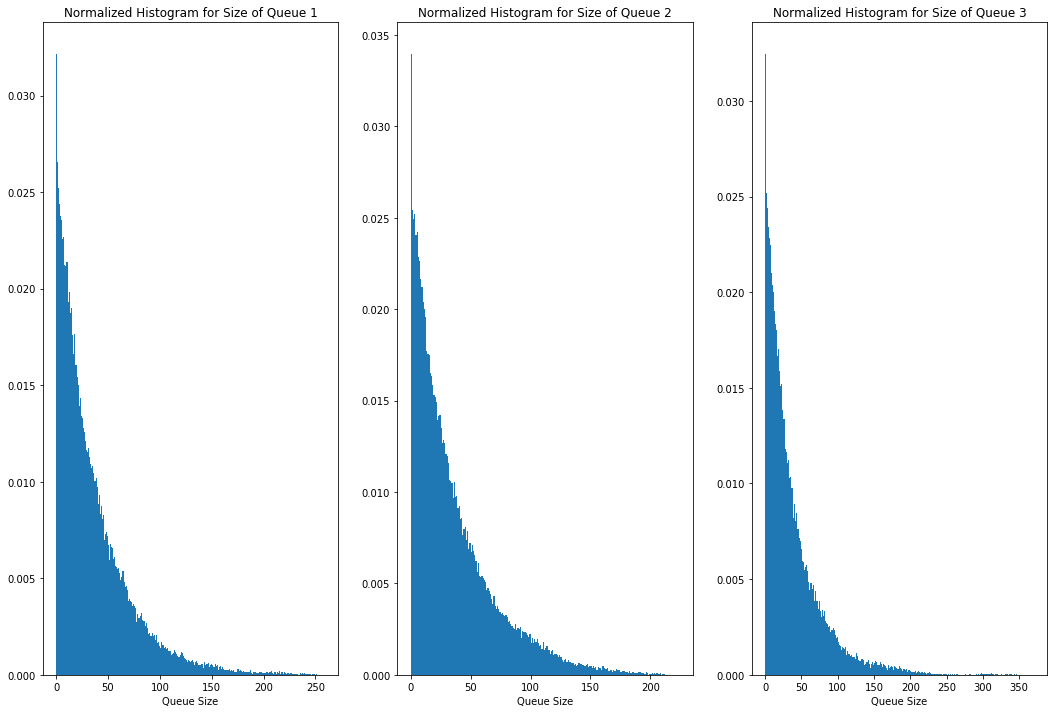

In [8]:
# output for strategy 3

print('Policy = Random')
print('Average Arrival Rate for Queue 1 = \u03BB\u2081 =', a1_avg)
print('Average Arrival Rate for Queue 2 = \u03BB\u2082 =', a2_avg)
print('Average Arrival Rate for Queue 3 = \u03BB\u2083 =', a3_avg)
print('Service Rate \u03BC = 1 (for all 3 queues)')
print('\nSteady-state Average Size of Queue 1 = \u0305q\u2081 \u2248', round(np.average(q1_output), 3))
print('Steady-state Average Size of Queue 2 = \u0305q\u2082 \u2248', round(np.average(q2_output), 3))
print('Steady-state Average Size of Queue 3 = \u0305q\u2083 \u2248', round(np.average(q3_output), 3))
print('\u0305q\u2081 + \u0305q\u2082 \u2248', round(np.average(q1_output + q2_output), 3))
print('Steady-state Average Total Queue Size \u2248', round(np.average(q1_output + q2_output + q3_output), 3))

plt.figure(figsize = (18, 12))

plt.subplot(1, 3, 1)

plt.hist(q1_output, bins = np.linspace(0, int(max(q1_output)) + 1, int(max(q1_output) + 2)), density = True)
plt.xlabel('Queue Size')
plt.title('Normalized Histogram for Size of Queue 1')


plt.subplot(1, 3, 2)

plt.hist(q2_output, bins = np.linspace(0, int(max(q2_output)) + 1, int(max(q2_output) + 2)), density = True)
plt.xlabel('Queue Size')
plt.title('Normalized Histogram for Size of Queue 2')


plt.subplot(1, 3, 3)

plt.hist(q3_output, bins = np.linspace(0, int(max(q3_output)) + 1, int(max(q3_output) + 2)), density = True)
plt.xlabel('Queue Size')
plt.title('Normalized Histogram for Size of Queue 3')

plt.show()